## Linear ALgebra

If the 2-norm is too high so the matrix is ill-conditioned
The condition number of the matrix could amplified the error on the data if it is too big

random matrix execution for n equals to a 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 


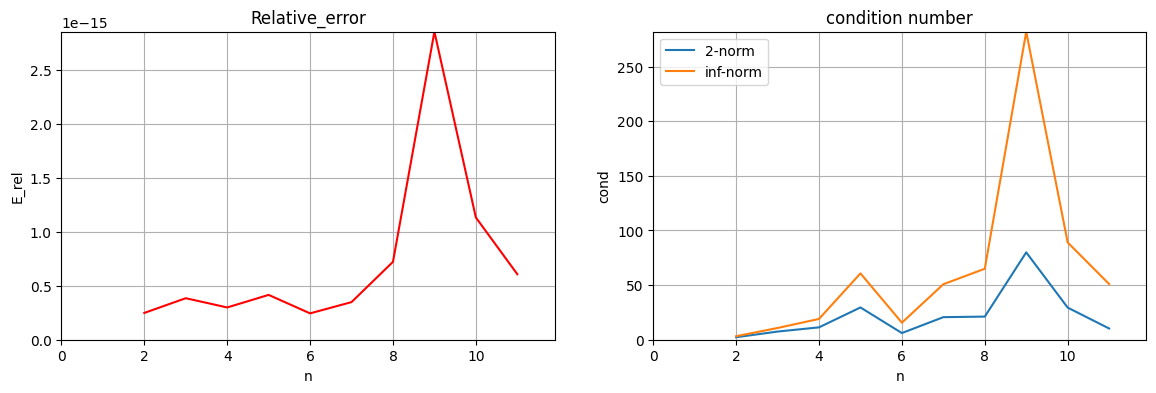

random matrix execution for n equals to a 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 


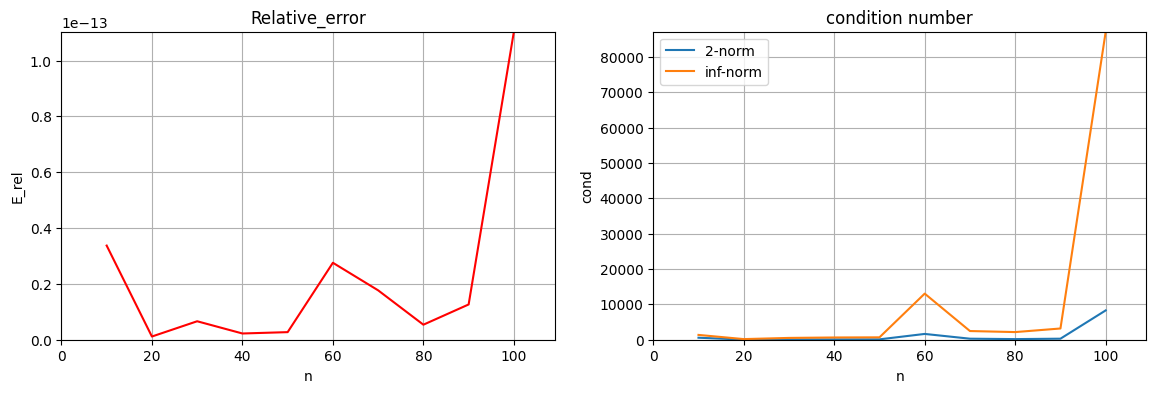

vander execution for n equals to a 5, 10, 15, 20, 25, 30, 


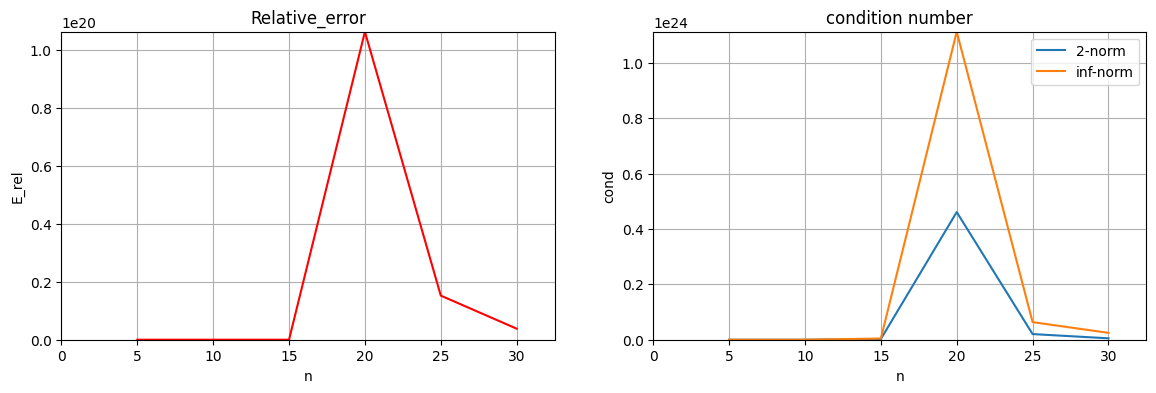

hilbert execution for n equals to a 4, 5, 6, 7, 8, 9, 10, 11, 12, 


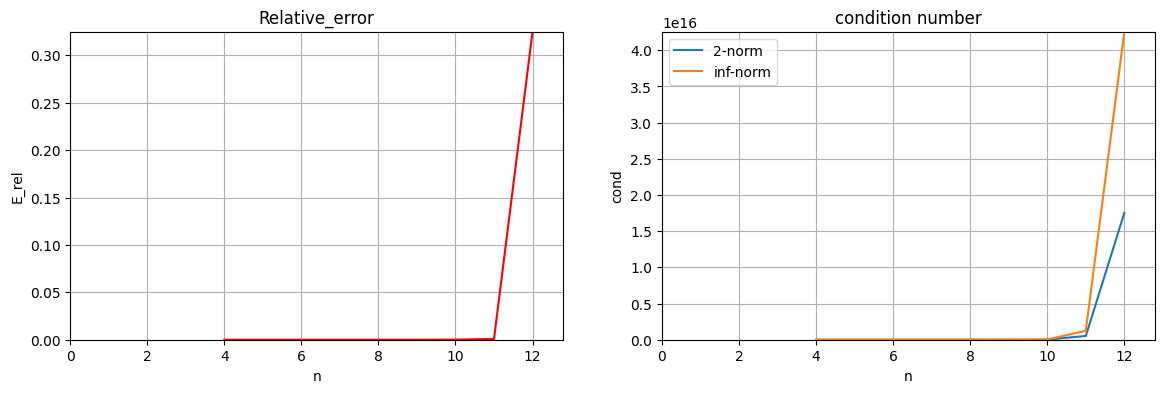

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spLin

def computeError(x_true, x_sol):
  return np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)


def createMatricesAndCompute(A, x):
  x_true = x.T # transpose of the vector

  B = A@x_true
  x_sol = np.linalg.solve(A, B)

  error = computeError(x_true, x_sol)
  cond2norm = np.linalg.cond(A, 2)
  condInfNorm = np.linalg.cond(A, np.inf)

  return [error, cond2norm, condInfNorm]

def visualize(n_array, errors, cond2norm, condInfNorm, a, b):
  # Visualize
  plt.figure(figsize=(14, 4))
  plt.subplot(1, 2, 1) 
  plt.plot(n_array, np.array(errors), color='red')
  plt.title('Relative_error')
  plt.xlabel('n')
  plt.ylabel('E_rel')
  plt.xlim([0, b+((b-a)/10)])
  plt.ylim([0, max(errors)])
  plt.grid() # the function grid close the firts subplot

  plt.subplot(1, 2, 2)
  plt.plot(n_array, cond2norm)
  plt.title('condition number')
  plt.xlabel('n')
  plt.ylabel('cond')
  plt.xlim([0, b+((b-a)/10)])
  plt.ylim([0, max(max(cond2norm), max(condInfNorm))])
  plt.grid()

  plt.plot(n_array, condInfNorm)
  plt.legend(['2-norm', 'inf-norm'])

  plt.show()


def exec(a, b, N, matrix=None):
  n_array = np.linspace(a, b, N)
  if matrix is not None:
    p = str(matrix) + ' execution for n equals to a '
  else:
    p = "random matrix" + ' execution for n equals to a '
  for i in n_array:
    p = p + str(int(i)) + ", "
  print(p)

  errors = []
  cond2norm = []
  condInfNorm = []

  for i in n_array:
    n = int(i)
    if not matrix: 
      res = createMatricesAndCompute(np.random.randn(n,n), np.ones(n))
      errors.append(res[0])
      cond2norm.append(res[1])
      condInfNorm.append(res[2])
    else:
      if matrix == 'vander':
        vector = []
        for j in range(n):
          #print(str(j))
          vector.append(j+1)
        vector = np.array(vector)
        #print(vector)
        res = createMatricesAndCompute(np.vander(vector), vector)
        errors.append(res[0])
        cond2norm.append(res[1])
        condInfNorm.append(res[2])
      if matrix == 'hilbert':
        vector = []
        for j in range(n):
          #print(str(j))
          vector.append(j+1)
        vector = np.array(vector)
        #print(vector)
        res = createMatricesAndCompute(spLin.hilbert(n), np.ones(n))
        errors.append(res[0])
        cond2norm.append(res[1])
        condInfNorm.append(res[2])

  visualize(n_array, errors, cond2norm, condInfNorm, a, b)

print("If the 2-norm is too high so the matrix is ill-conditioned",\
"The condition number of the matrix could amplified the error on the data if it is too big\n", sep='\n')

exec(2, 11, 10)
exec(10, 100, 10)
exec(5, 30, 6, 'vander')
exec(4, 12, 9, 'hilbert')

## Floating Point Arithmetic

In [2]:
epsilon = 1.0

while 1+epsilon>1:
  epsilon = epsilon/2

print("Machine error: ",str(epsilon))

Machine error:  1.1102230246251565e-16


In [3]:
# Euler value: lim n-> inf of a_n = e

def euler(n):
  return (1 + 1/n)**n

print(str(euler(1e1)))
print(str(euler(1e2)))
print(str(euler(1e3)))
print(str(euler(1e6)))
print(str(euler(1e9)))
print(str(euler(1e10)))
print(str(euler(1e12)))
print(str(euler(1e13)))
print(str(euler(1e14)))
print(str(euler(1e15)))
print(str(euler(1e16)))

print('this appen beacause 1/n is truncated to 0, so the equation is 1**n that is equal to 1')

2.5937424601000023
2.7048138294215285
2.7169239322355936
2.7182804690957534
2.7182820520115603
2.7182820532347876
2.7185234960372378
2.716110034086901
2.716110034087023
3.035035206549262
1.0
this appen beacause 1/n is truncated to 0, so the equation is 1**n that is equal to 1


In [4]:
# compute the rank of A and B and their eigenvalue

import numpy as np

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rkA = np.linalg.matrix_rank(A)
rkB = np.linalg.matrix_rank(B)
print('Rank of A: ', rkA, '\nRank of B: ', rkB)

eigA = np.linalg.eig(A)
eigB = np.linalg.eig(B)
print('Eig of A: ', eigA[0])
print('Eig of B: ', eigB[0])

detA = np.linalg.det(A)
detB = np.linalg.det(B)
print("detA: ", detA, "\ndetB: ", detB)

print("If 0 is an eigenvalue then the matrix has not the full-rank\n")
print("The determinant of a matrix is equal at the product of the eigenvalue, so if the matrix is not full-rank so the determinant is equal to 0 and one or more of the eigenvalue is 0")

C = np.array([[1,2,3], [2,4,6], [3,6,9]])
rkC = np.linalg.matrix_rank(C)
eigC = np.linalg.eig(C)
detC = np.linalg.det(C)
print('rank of C: ', rkC, '\neig of C: ', eigC[0], "\ndetC: ", detC)

Rank of A:  2 
Rank of B:  1
Eig of A:  [5. 2.]
Eig of B:  [5. 0.]
detA:  10.000000000000002 
detB:  0.0
If 0 is an eigenvalue then the matrix has not the full-rank

The determinant of a matrix is equal at the product of the eigenvalue, so if the matrix is not full-rank so the determinant is equal to 0 and one or more of the eigenvalue is 0
rank of C:  1 
eig of C:  [ 1.40000000e+01  3.58824538e-16 -5.87239501e-16] 
detC:  0.0
